In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [108]:
frame = np.zeros((10,10))

In [109]:
#select the row for first step
step = np.random.randint(0,10)

In [110]:
right = 1 if np.random.rand() < 0.5 else 0
col = 0 if right else 9

In [111]:
frame[step,col] = 1

In [112]:
frame

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [113]:
len(frame[0])

10

In [114]:
last_step = step
lower = max(0,last_step)
upper = min(9,last_step+1)
step = np.random.randint(lower,upper+1)

In [115]:
step

9

In [116]:
column = 5 if right else 4
frame[step,column] = 1

In [117]:
frame

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [130]:
def next_frame(last_step,last_frame,col):
    lower = max(0,last_step)
    upper = min(len(last_frame[0])-1,last_step+1)
    step = np.random.randint(lower,upper+1)
    frame = last_frame.copy()
    frame[step,col] = 1
    return frame,step
    
    
def build_frame(size):
    frame = np.zeros((size,size))
    frames = list()
    right = 1 if np.random.rand() < 0.5 else 0
    step = np.random.randint(0,size)
    col = 0 if right else size-1
    frame[step,col] = 1
    frames.append(frame)
    for i in range(1,size):
        col = i if right else size-1-i
        frame,step = next_frame(step,frame,col)
        frames.append(frame)
    return frames,right

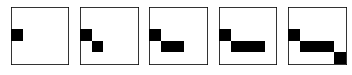

In [139]:
size = 5
frames,right = build_frame(size)
for i in range(size):
    plt.subplot(1, size, i+1)
    plt.imshow(frames[i],cmap='Greys')
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [140]:
def generate_example(size,n_patterns):
    X,y = list(),list()
    for _ in range(n_patterns):
        frames,right = build_frame(size)
        X.append(frames)
        y.append(right)
    X = np.array(X).reshape(n_patterns,size,size,size,1)
    y = np.array(y).reshape(n_patterns,1)
    return X,y

In [146]:
size = 50
#define the model
#cnn part
model = keras.models.Sequential()
model.add(keras.layers.TimeDistributed(keras.layers.Conv2D(2,(2,2),activation='relu'),
                                       input_shape=(None,size,size,1)))
model.add(keras.layers.TimeDistributed(keras.layers.MaxPooling2D(pool_size=(2,2))))
model.add(keras.layers.TimeDistributed(keras.layers.Flatten()))

#lstm part
model.add(keras.layers.LSTM(50))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_6 (TimeDist (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 1152)        0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                240600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________


In [149]:
X,y = generate_example(size,1000)
model.fit(X,y,batch_size=32,epochs=1)

Epoch 1/1
1000/1000 [==============================] - 75s 75ms/step - loss: 0.0447 - acc: 0.9850


In [151]:
#evaluation
X, y = generate_example(size, 100)
loss, acc = model.evaluate(X, y, verbose=0)
print( 'loss: %f, acc: %f' % (loss, acc*100))

loss: 0.016609, acc: 100.000000


In [155]:
#prediction
X,y = generate_example(size,1)
yhat = model.predict_classes(X)

In [156]:
yhat[0]

array([0])

In [157]:
y[0]

array([0])